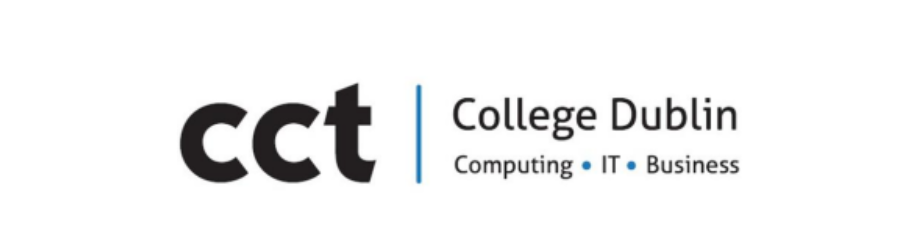

<h1 align="center">Forecasting Crime Rates in Ireland Using Time-Series Models</h1>
<h2 align="center">Lecturer: Dr. Muhammad Iqbal</h2>
<h3 align="center">Caio Machado de Oliveira</h3>
<h4 align="center">ID: 2020351</h4>
<h4 align="center">A Report Submitted in Partial Fulfilment 
of the requirements for the 
Degree of 
BSc in Computing in IT (4th year)</h4>

<h5 align="center">May/2024</h5>


In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

%matplotlib inline


# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

rcParams['figure.figsize'] = 15, 6

#ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score




from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm



import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima

from prophet import Prophet

from pandas import to_datetime




import itertools
import warnings

from datetime import datetime
from datetime import timedelta
from datetime import datetime
warnings.filterwarnings('ignore')



# Data Importing

In [2]:
data = pd.read_csv("crime-per-county.csv")

data.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1.0
1,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0.0
2,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0.0
3,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0.0
4,Recorded crime incidents,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1.0


# Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166992 entries, 0 to 166991
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATISTIC Label  166992 non-null  object 
 1   Quarter          166992 non-null  object 
 2   Garda Division   166992 non-null  object 
 3   Type of Offence  166992 non-null  object 
 4   UNIT             166992 non-null  object 
 5   VALUE            166383 non-null  float64
dtypes: float64(1), object(5)
memory usage: 7.6+ MB


In [4]:
data.describe()

,VALUE
count,166383.000000
mean,58.999219
std,149.652981
min,0.000000
25%,0.000000
50%,4.000000
75%,47.000000
max,2541.000000


In [5]:
data['Quarter'].unique()

array(['2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q1', '2004Q2',
       '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4',
       '2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2',
       '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4',
       '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
       '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
       '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
       '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4',
       '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2',
       '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4'],
      dtype=object)

In [6]:
data['Garda Division'].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [7]:
data['Type of Offence'].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Infanticide',
       'Dangerous driving leading to death', 'Sexual offences',
       'Rape and sexual assault', 'Other sexual offences',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Murder-attempt', 'Threat to kill or cause serious harm',
       'Harassment and related offences',
       'Assault causing harm, poisoning', 'Other assault',
       'Dangerous or negligent acts',
       'Dangerous driving causing serious bodily harm',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Driving/in charge of a vehicle under the influence of drugs',
       'Endangerment with potential for serious harm/death',
       'Abandoning a child, child neglect and cruelty',
       'Unseaworthy/dangerous use of boat or ship',
       'False alarm/interference with aircraft or air transport facilities',
       'Endangering traffic offences', 'Kidnapping and related offences',
     

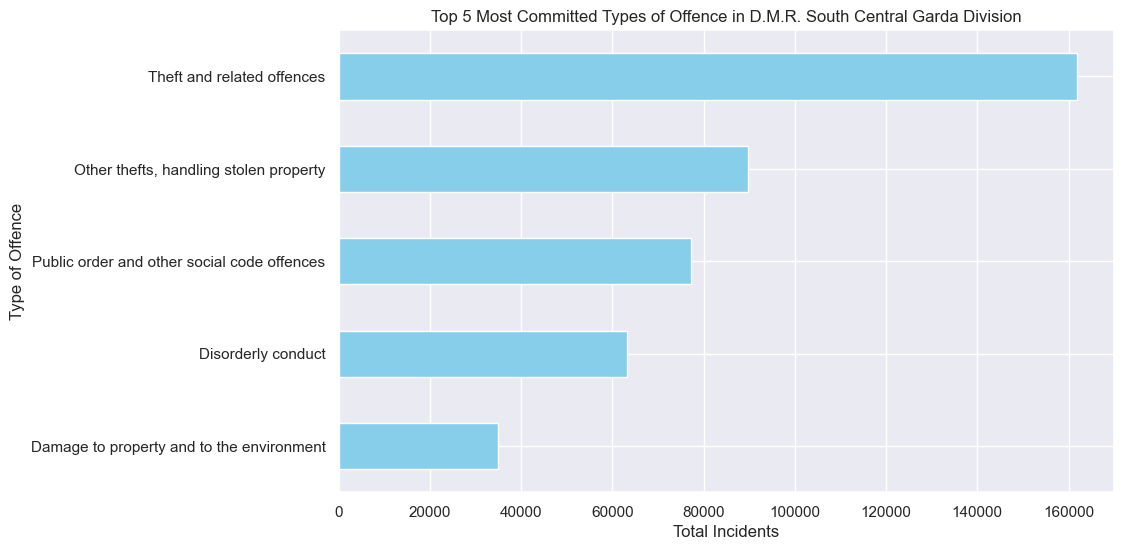

In [8]:
# Filter data for 'D.M.R. South Central Garda Division'
data_south_central = data[data['Garda Division'] == 'D.M.R. South Central Garda Division']

# Group by 'Type of Offence' and sum the 'VALUE' column to get total incidents for each type of offence
data_south_central_5 = data_south_central.groupby('Type of Offence')['VALUE'].sum()

# Sort the totals and get the top 5 most committed types of offences
data_south_central_plot = data_south_central_5.sort_values(ascending=False).head(5)

# Plot the data using horizontal bars
plt.figure(figsize=(10, 6))
data_south_central_plot.plot(kind='barh', color='skyblue')
plt.xlabel('Total Incidents')
plt.title('Top 5 Most Committed Types of Offence in D.M.R. South Central Garda Division')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
plt.show()

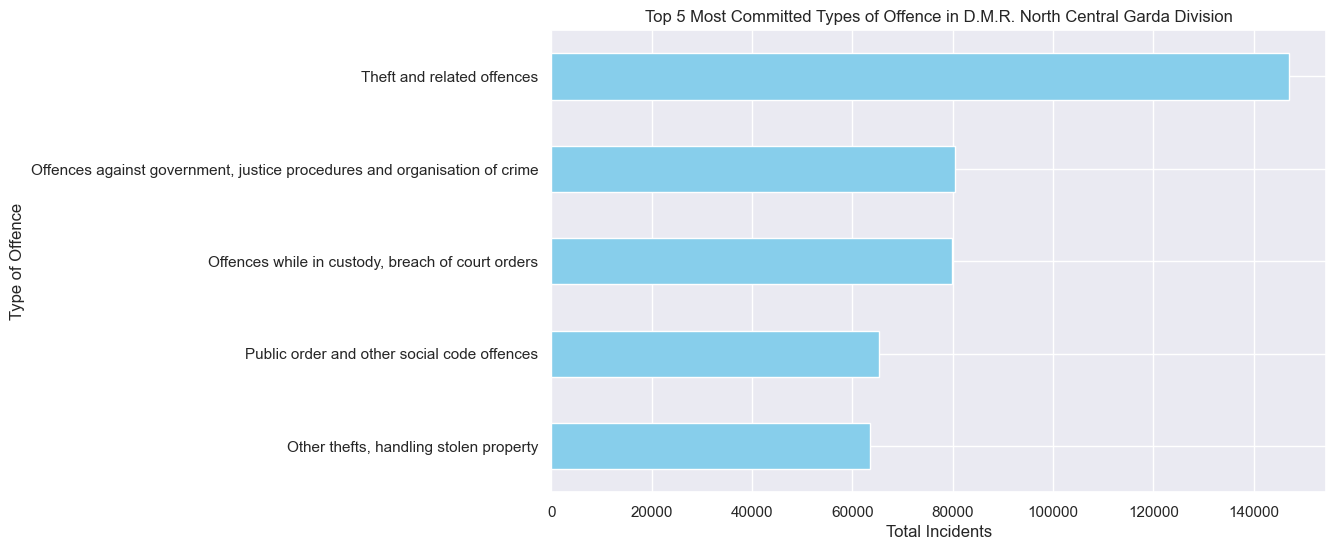

In [9]:
# Filter data for 'D.M.R. South Central Garda Division'
data_north_central = data[data['Garda Division'] == 'D.M.R. North Central Garda Division']

# Group by 'Type of Offence' and sum the 'VALUE' column to get total incidents for each type of offence
data_north_central_5 = data_north_central.groupby('Type of Offence')['VALUE'].sum()

# Sort the totals and get the top 5 most committed types of offences
data_north_central_plot = data_north_central_5.sort_values(ascending=False).head(5)

# Plot the data using horizontal bars
plt.figure(figsize=(10, 6))
data_north_central_plot.plot(kind='barh', color='skyblue')
plt.xlabel('Total Incidents')
plt.title('Top 5 Most Committed Types of Offence in D.M.R. North Central Garda Division')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value on top
plt.show()

# Data Preparation


In [10]:
# drop columns that won't be used
data.drop(columns =["STATISTIC Label", "UNIT"], inplace=True)

In [11]:
# renaming columns to make clearer
data.rename(columns = {'Type of Offence': 'Offence', 'VALUE': 'Crime'}, inplace=True)

In [12]:
# Removing "Garda Division" from each entry
data['Garda Division'] = data['Garda Division'].str.replace(" Garda Division", "")

In [13]:
# filling NA observations withh 0
data['Crime'] = data['Crime'].fillna(0)

In [14]:
# turning column 'Crime' data type into int64
data['Crime'] = data['Crime'].astype('int64')

In [15]:
# checking results
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166992 entries, 0 to 166991
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         166992 non-null  object
 1   Garda Division  166992 non-null  object
 2   Offence         166992 non-null  object
 3   Crime           166992 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [16]:
# changing date format from 2003Q1 to 2003-01-01
def quarter_to_date(year_quarter):
    year, quarter = year_quarter.split('Q')
    first_month = {'1': '01', '2' : '04' , '3' : '07' , '4' : '10'}
    return f"{year}-{first_month[quarter]}-1"

data['Date'] = data['Quarter'].apply(quarter_to_date)

In [17]:
# Correct way using .loc to avoid SettingWithCopyWarning
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166992 entries, 0 to 166991
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Quarter         166992 non-null  object
 1   Garda Division  166992 non-null  object
 2   Offence         166992 non-null  object
 3   Crime           166992 non-null  int64 
 4   Date            166992 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.4+ MB


In [19]:
# changing column to datetime and turning into index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [20]:
# dropping 'Quarter' column 
data.drop(columns =['Quarter'], inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166992 entries, 2003-01-01 to 2023-10-01
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Garda Division  166992 non-null  object
 1   Offence         166992 non-null  object
 2   Crime           166992 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [22]:
# droppping observations with 0 values
data = data[data['Crime'] != 0]

In [23]:
# final check
data.info() 
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120808 entries, 2003-01-01 to 2023-10-01
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Garda Division  120808 non-null  object
 1   Offence         120808 non-null  object
 2   Crime           120808 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


,Crime
count,120808.000000
mean,81.256763
std,170.400775
min,1.000000
25%,2.000000
50%,16.000000
75%,86.000000
max,2541.000000


In [24]:
data.head(10)

,Garda Division,Offence,Crime
Date,,,
2003-01-01,Cavan/Monaghan,Homicide offences,1
2003-01-01,Cavan/Monaghan,Dangerous driving leading to death,1
2003-01-01,Cavan/Monaghan,Sexual offences,23
2003-01-01,Cavan/Monaghan,Rape and sexual assault,23
2003-01-01,Cavan/Monaghan,"Attempts/threats to murder, assaults, harassme...",128
2003-01-01,Cavan/Monaghan,Harassment and related offences,16
2003-01-01,Cavan/Monaghan,"Assault causing harm, poisoning",22
2003-01-01,Cavan/Monaghan,Other assault,90
2003-01-01,Cavan/Monaghan,Dangerous or negligent acts,123


# Data Exploration

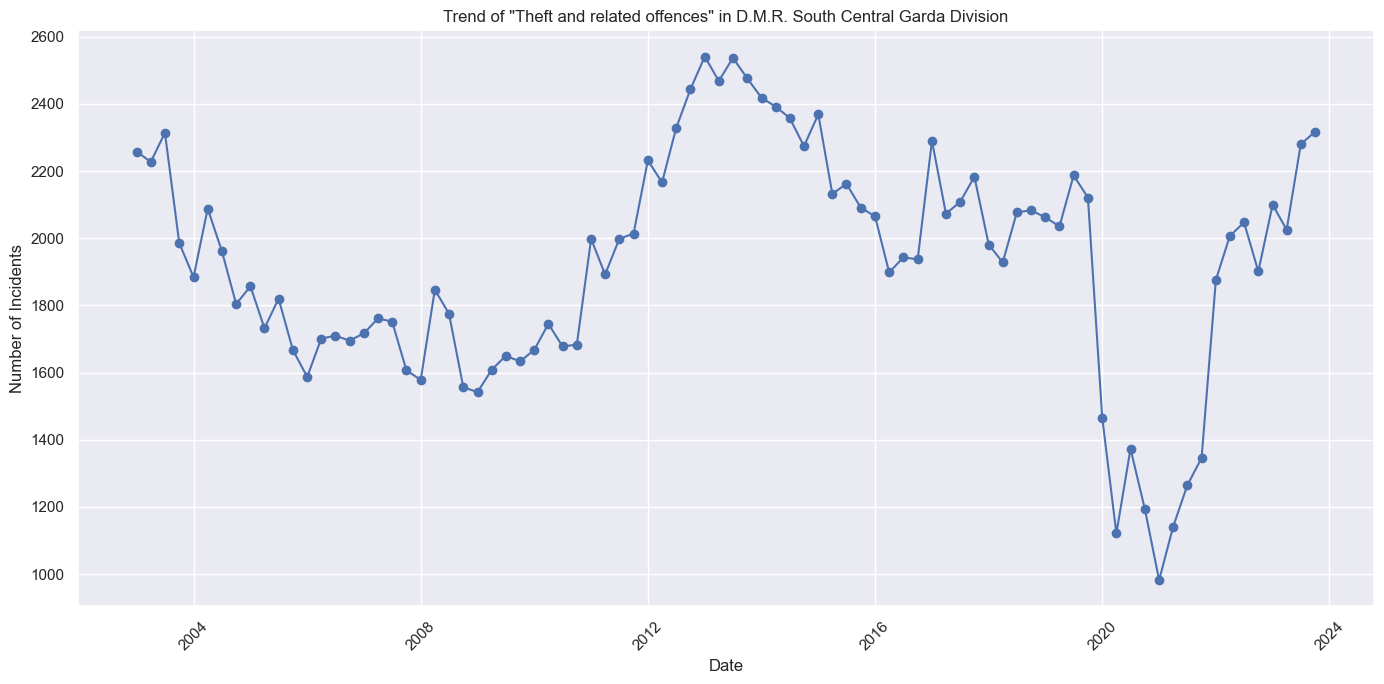

In [25]:
# Filter the data for "Theft from person" crimes in "D.M.R. North Central Garda Division"
theft_from_person_data = data[
    (data['Offence'] == 'Theft and related offences') &
    (data['Garda Division'] == 'D.M.R. South Central')
]


# Plotting the line graph
plt.figure(figsize=(14, 7))
plt.plot(theft_from_person_data.index, theft_from_person_data['Crime'], marker='o', linestyle='-', color='b')
plt.title('Trend of "Theft and related offences" in D.M.R. South Central Garda Division')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


In [26]:
# dropping columns that won't be used anymore
theft_from_person_data.drop(columns =['Garda Division', 'Offence'], inplace=True)

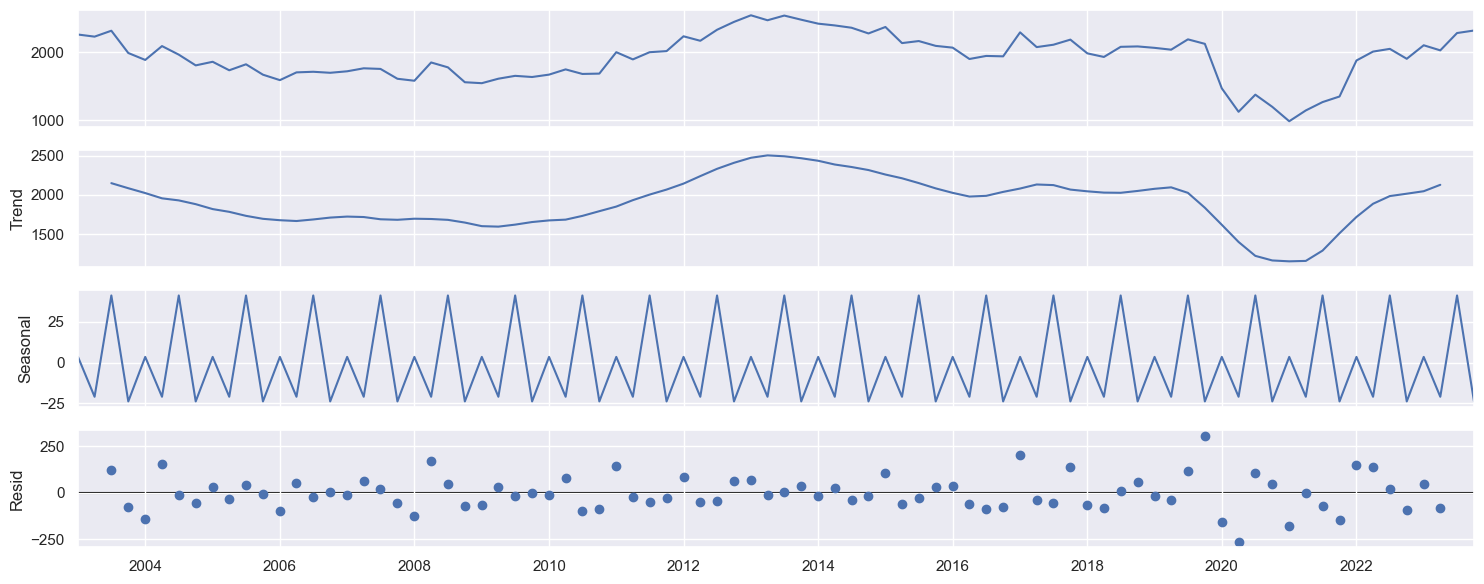

In [27]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(theft_from_person_data, model='additive')

# Plot the decomposed components
decomposition.plot()
plt.show()

In [28]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(theft_from_person_data['Crime'])

# Display the results of the ADF test
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                 -2.745914
p-value                         0.066425
#Lags Used                      4.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64

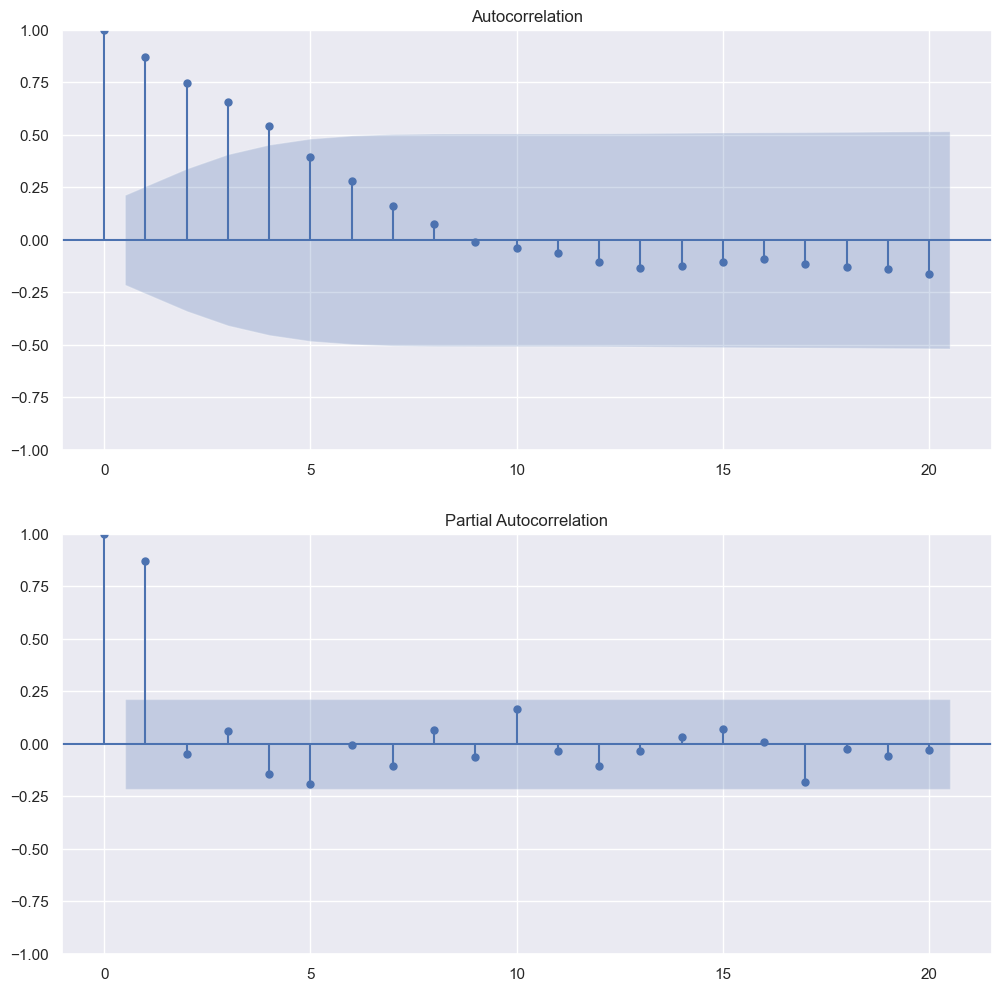

In [29]:
# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the Autocorrelation Function (ACF)
plot_acf(theft_from_person_data, lags=20, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(theft_from_person_data, lags=20, ax=ax2, method='ywm')

plt.show()

# Start training

In [30]:
theft_from_person_data = theft_from_person_data.loc['2003-01-01':'2019-10-01']
train = theft_from_person_data['Crime'].loc['2003-01-01': '2017-10-01']
test = theft_from_person_data['Crime'].loc['2018-01-01':'2019-10-01']

<Axes: xlabel='Date'>

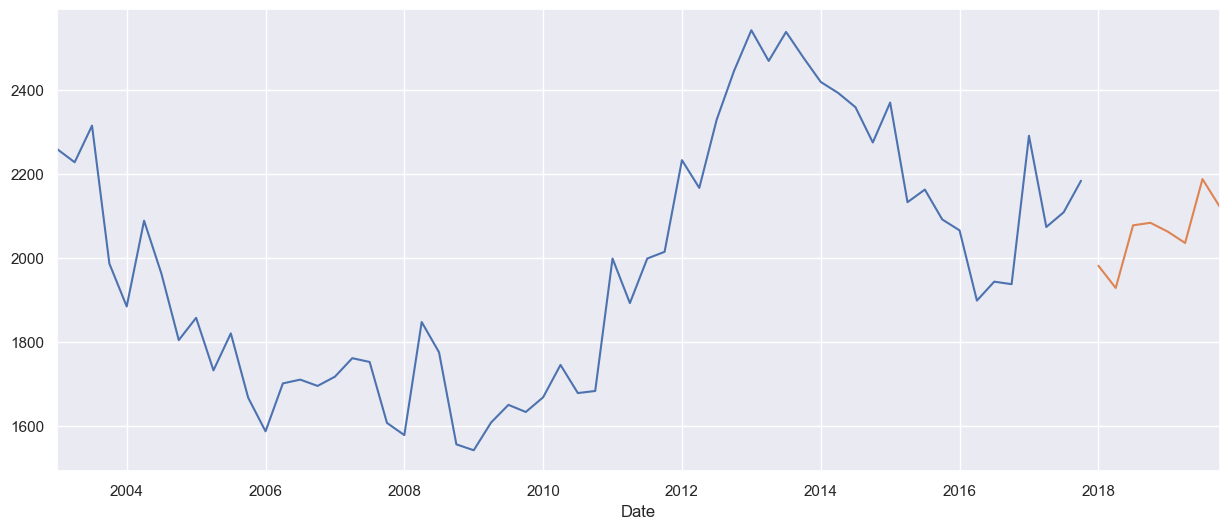

In [31]:
train.plot()
test.plot()

In [32]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(train)

# Display the results of the ADF test
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                 -1.526337
p-value                         0.520445
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64

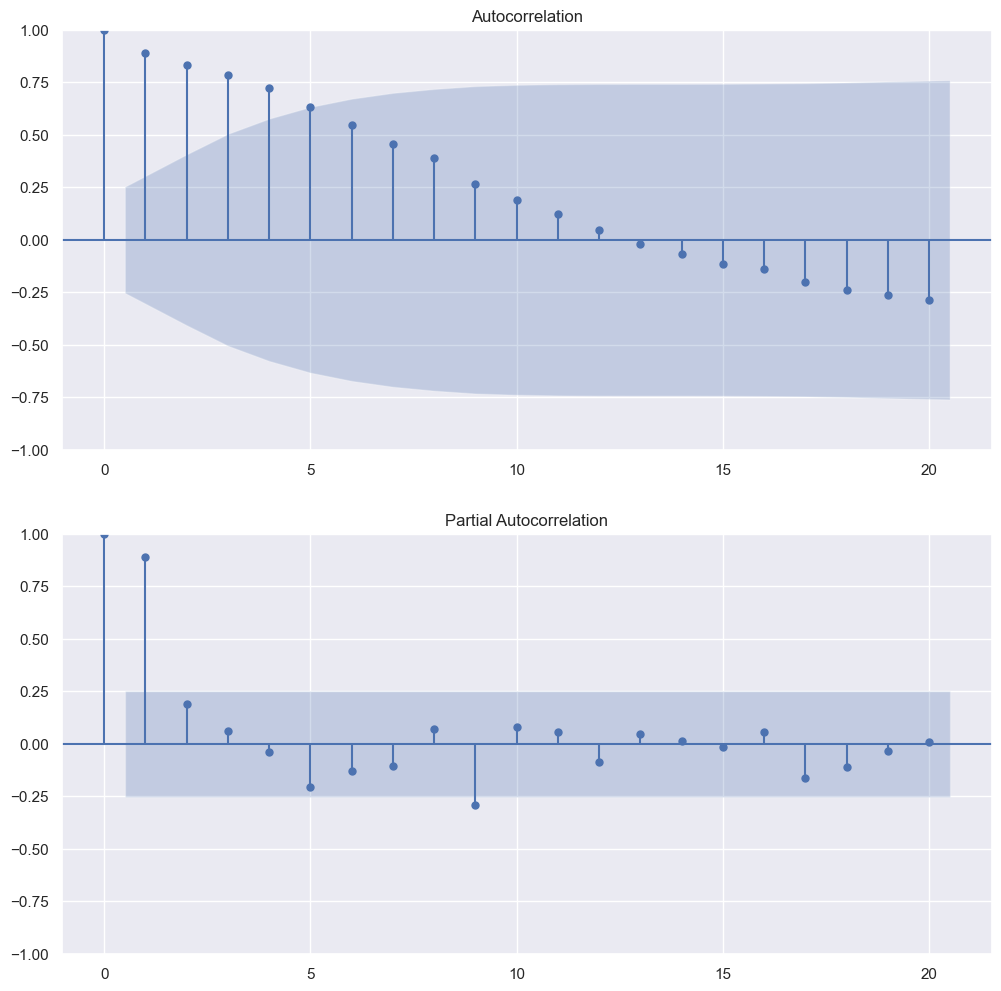

In [33]:
# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the Autocorrelation Function (ACF)
plot_acf(train, lags=20, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(train, lags=20, ax=ax2, method='ywm')

plt.show()

# Differencing Training Data

<Axes: xlabel='Date'>

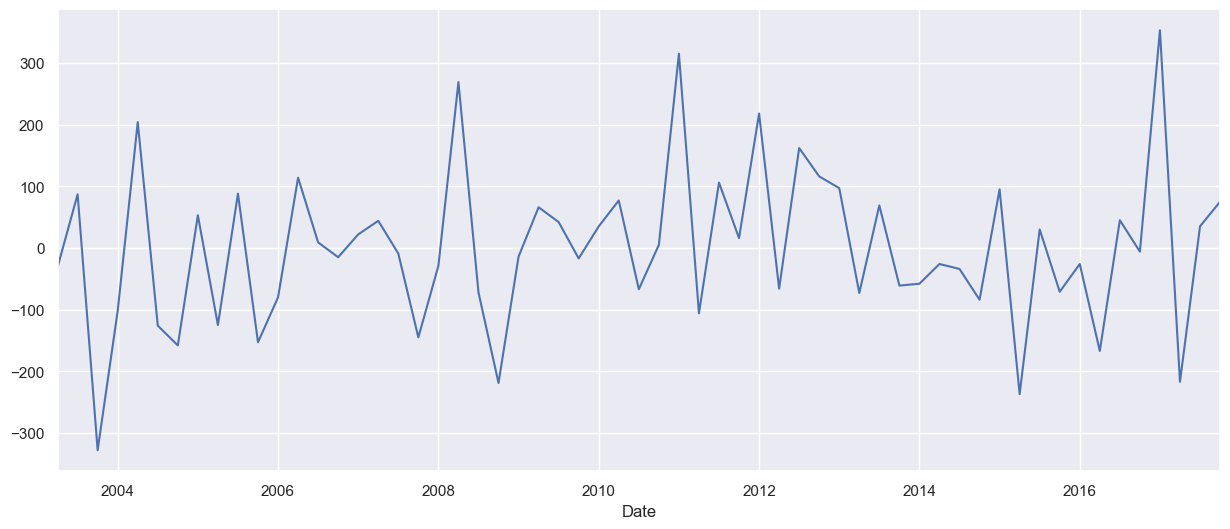

In [34]:
train_diff = train.diff().dropna()
train_diff.plot()

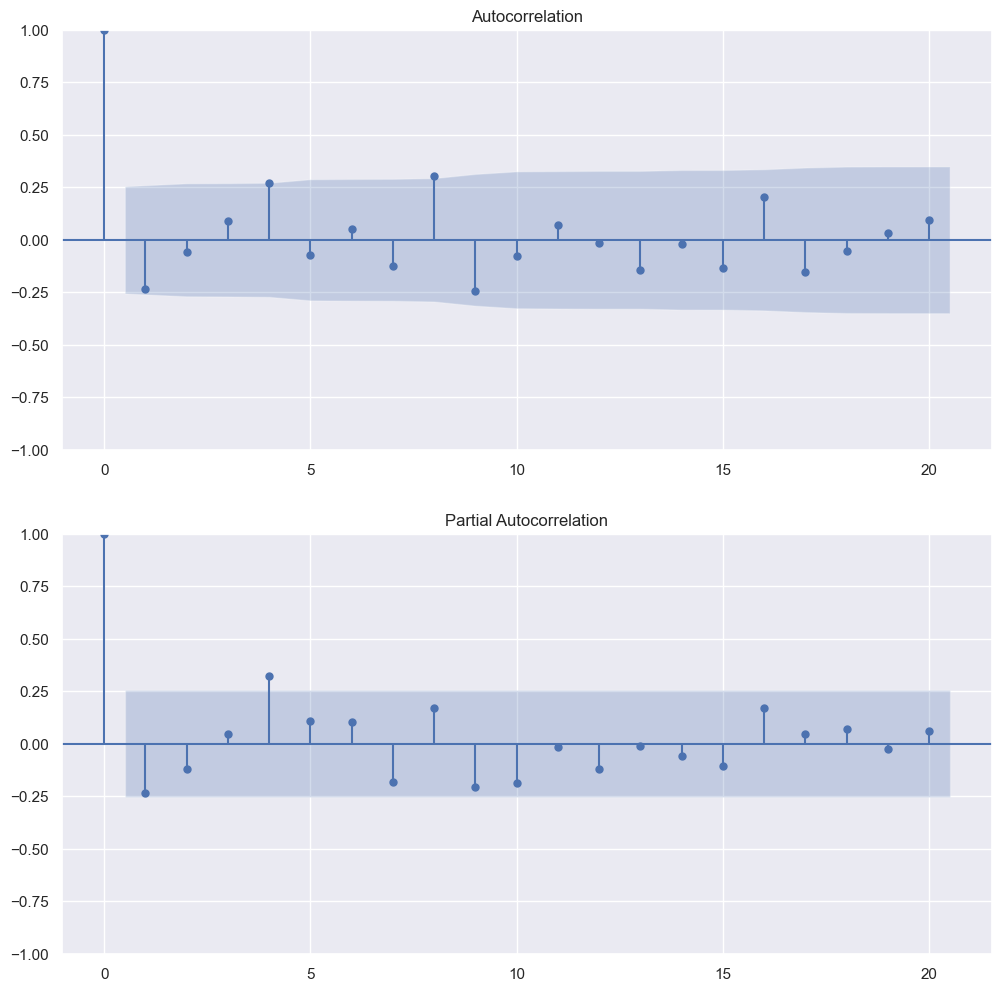

In [35]:
# Create figure for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the Autocorrelation Function (ACF)
plot_acf(train_diff, lags=20, ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(train_diff, lags=20, ax=ax2, method='ywm')

plt.show()

In [36]:
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(train_diff)

# Display the results of the ADF test
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic                 -2.942449
p-value                         0.040630
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64

# MODELING

### AUTO ARIMA 

In [37]:
train_arima = train
test_arima = test

In [38]:
auto_arima = pm.auto_arima(train_arima, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=785.287, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=764.296, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=783.292, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=752.331, Time=0.12 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=733.850, Time=0.11 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=733.485, Time=0.16 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=733.530, Time=0.12 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=734.451, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=732.451, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=736.132, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=732.172, Time=0.22 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=733.389, Time=0.27 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=733.274, Time

# Grid Search (For Loop) ARIMA

In [39]:
# # Define the range of parameters
# p = range(0, 10)  # Range of AR parameters
# d = range(0, 2)   # Range of I parameters
# q = range(0, 10)  # Range of MA parameters

# # Generate all combinations of p, d, q triplets
# pdq = list(itertools.product(p, d, q))


# print('Examples of parameter combinations for ARIMA...')
# print('ARIMA: {}'.format(pdq[1]))
# print('ARIMA: {}'.format(pdq[2]))

# warnings.filterwarnings("ignore")  # Suppress warnings to keep output clean

# AIC = []
# ARIMA_model = []
# for param in pdq:
#     try:
#         mod = ARIMA(train, order=param)
#         results = mod.fit()
#         print('ARIMA{} - AIC:{}'.format(param, results.aic))
#         AIC.append(results.aic)
#         ARIMA_model.append(param)
#     except Exception as e:
#         print(f'Failed to fit ARIMA{param}: {str(e)}')

# if AIC:  # Check if the list is not empty
#     min_aic_index = AIC.index(min(AIC))  # Index of the minimum AIC
#     best_param = ARIMA_model[min_aic_index]
#     print(f"Best ARIMA model: ARIMA{best_param} with AIC {min(AIC)}")
# else:
#     print("No successful model fits were found.")

In [40]:
#Best ARIMA model: ARIMA(7, 2, 4) with AIC 821.7591923987721

# Applying ARIMA Model

In [41]:
rolling_predictions_arima = pd.Series(index=test_arima.index)

for train_end_arima in test_arima.index:
    # Use data up to three months before the current point in test
    train_arima = theft_from_person_data['Crime'][:train_end_arima - pd.DateOffset(months=3)]
    
    # Initialize and fit the ARIMA model
    model_arima = ARIMA(train_arima, order=(7,2,4)) # order=(7,2,4)
    model_fit_arima = model_arima.fit()
    
    # Forecast the next point
    pred_arima = model_fit_arima.forecast()
    rolling_predictions_arima[train_end_arima] = pred_arima.iloc[0]  # Store the prediction

# Print the summary of the model from the last iteration
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Crime   No. Observations:                   67
Model:                 ARIMA(7, 2, 4)   Log Likelihood                -396.301
Date:                Wed, 22 May 2024   AIC                            816.602
Time:                        14:11:20   BIC                            842.694
Sample:                    01-01-2003   HQIC                           826.897
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8988      0.298     -3.013      0.003      -1.483      -0.314
ar.L2         -0.6061      0.443     -1.369      0.171      -1.474       0.262
ar.L3         -0.1246      0.589     -0.212      0.8

# Forecasting

In [42]:
# Forecast the same number of steps as in the test set
forecast_arima = model_fit_arima.get_prediction(start=test_arima.index[0], end=test_arima.index[-1], dynamic=False)
predicted_arima = forecast_arima.predicted_mean
ci_arima = forecast_arima.conf_int()


# Checking Residuals

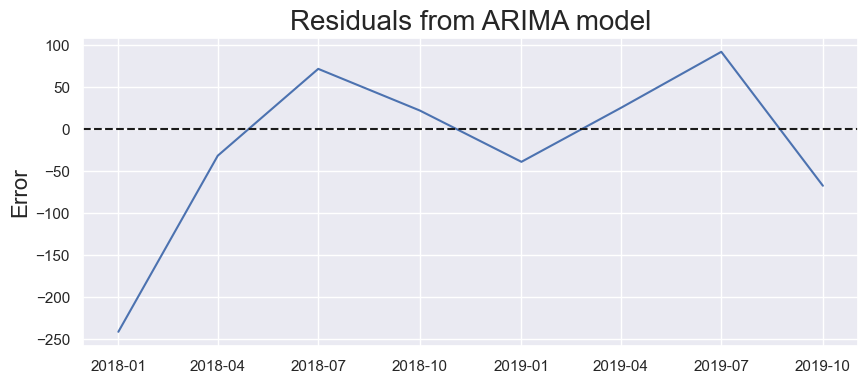

In [43]:
residuals_arima = test_arima - predicted_arima

plt.figure(figsize=(10,4))
plt.plot(residuals_arima)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

# Plot

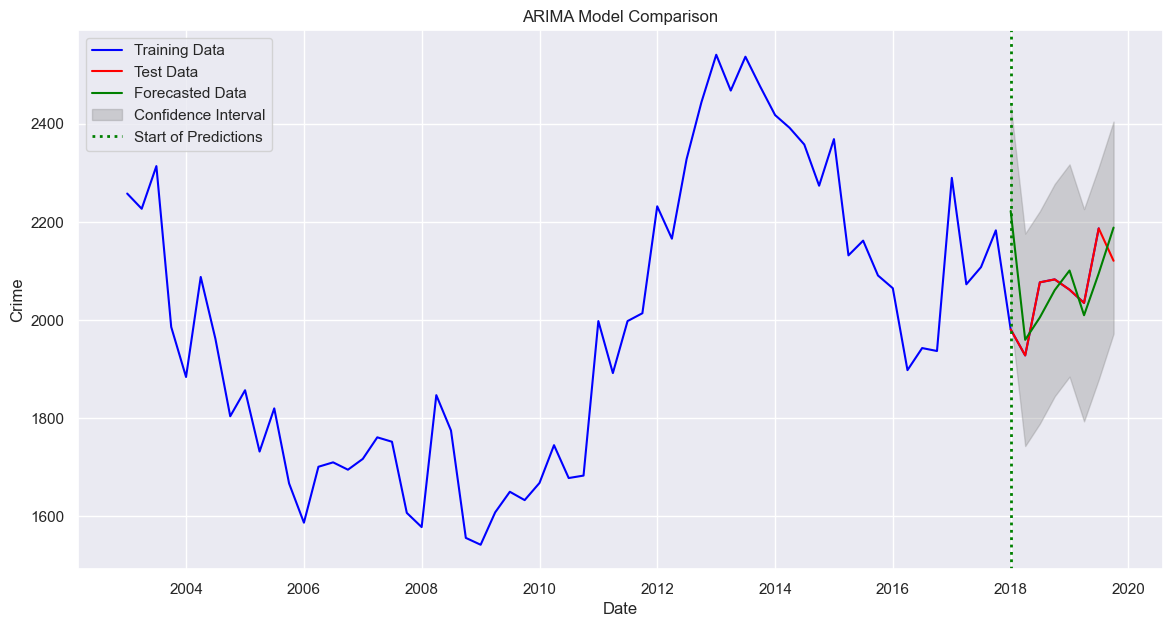

In [44]:
plt.figure(figsize=(14, 7))  # Adjusting figure size to match the first plot


# Plotting training data
plt.plot(train_arima, label='Training Data', color='blue')  
# Plotting test data
plt.plot(test_arima.index, test_arima, label='Test Data', color='red')  

# Plotting forecasted data
plt.plot(test_arima.index, predicted_arima, label='Forecasted Data', color='green')  

# Adding confidence interval
plt.fill_between(ci_arima.index, ci_arima.iloc[:, 0], ci_arima.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')  

# adding a line where the model starts
plt.axvline(x=test_arima.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

# Adding titles and labels similar to the first plot
plt.title('ARIMA Model Comparison')
plt.xlabel('Date')
plt.ylabel('Crime')  # Adjust label according to the data context
plt.legend()
plt.grid(True)  # Enabling grid for better visualization
plt.show()

# Evaluation

In [45]:
# Calculate RMSE
rmse = np.sqrt(((predicted_arima - test_arima) ** 2).mean())
mae = mean_absolute_error(test_arima, predicted_arima)
mape = np.mean(np.abs((test_arima - predicted_arima) / test)) * 100

print('MAE:', round(mae, 2))
print('RMSE:', round(rmse, 2))
print('MAPE:', round(mape, 2), '%')

#GRID SEARCH RESULTS
# ARIMA(7,2,4)
# MAE: 73.78
# RMSE: 100.02
# MAPE: 3.61 %

#AUTO ARIMA RESULTS
# ARIMA order(3,2,2)
# MAE: 63.58
# RMSE: 106.18
# MAPE: 3.11 %

MAE: 73.78
RMSE: 100.02
MAPE: 3.61 %


In [46]:
################################################ SARIMA MODEL ################################################################
##############################################################################################################################
##############################################################################################################################

# Seasonal ARIMA Model

# Auto ARIMA (SARIMA)

In [47]:
train_sarima = train
test_sarima = test

In [48]:

auto_arima_s = pm.auto_arima(train_sarima,
                           start_p=0, start_q=0,
                           max_p=12, max_q=12,
                           start_P=0, start_Q=0,
                           max_P=12, max_Q=12,
                           m=4,
                           d=None, D=None,
                           max_d=3, max_D=2,
                           seasonal=True,
                           stepwise=True,
                           trace=True,
                           test='adf',
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal_test='ocsb',
                           information_criterion='aic',
                           n_jobs=-1)

print(auto_arima_s.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=783.292, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=759.433, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=762.303, Time=0.02 sec
 ARIMA(1,2,0)(2,0,0)[4]             : AIC=753.921, Time=0.08 sec
 ARIMA(1,2,0)(3,0,0)[4]             : AIC=754.019, Time=0.14 sec
 ARIMA(1,2,0)(2,0,1)[4]             : AIC=748.490, Time=0.28 sec
 ARIMA(1,2,0)(1,0,1)[4]             : AIC=757.071, Time=0.12 sec
 ARIMA(1,2,0)(3,0,1)[4]             : AIC=750.440, Time=0.42 sec
 ARIMA(1,2,0)(2,0,2)[4]             : AIC=750.399, Time=0.24 sec
 ARIMA(1,2,0)(1,0,2)[4]             : AIC=752.981, Time=0.34 sec
 ARIMA(1,2,0)(3,0,2)[4]             : AIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(2,0,1)[4]             : AIC=764.364, Time=0.11 sec
 ARIMA(2,2,0)(2,0,1)[4]             : AIC=inf, Time=0.19 sec
 ARIMA(1,2,1)(2,0,1)[4]             : AIC=inf, Time=0.30 se

# Grid Search (For Loop) SARIMA

In [49]:
# # Define the d and q parameters to take any value between 0 and 1
# d = range(0, 2)
# # Define the p parameters to take any value between 0 and 3
# q = p = range(0, 10)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))

# # Generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


In [50]:


# warnings.filterwarnings("ignore") # specify to ignore warning messages

# AIC = []
# SARIMAX_model = []
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(train,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
#             AIC.append(results.aic)
#             SARIMAX_model.append([param, param_seasonal])
#         except:
#             continue

In [51]:
# print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))
# #The smallest AIC is 429.935229273857 for model SARIMAX(3, 1, 1)x(9, 1, 0, 4) 30/04/2024 

# Applying SARIMA Model

In [52]:
rolling_predictions_sarima = pd.Series(index=test_sarima.index)

for train_end_sarima in test_sarima.index:
    # Use data up to three months before the current point in test
    train_sarima = theft_from_person_data['Crime'][:train_end_sarima - pd.DateOffset(months=3)]
    
    # Initialize and fit the ARIMA model
    model_sarima = SARIMAX(train_sarima, order=(3,1,1), seasonal_order=(9,1,0,4),  # Example seasonal order
                           enforce_stationarity=False, enforce_invertibility=False)
    model_fit_sarima = model_sarima.fit()
    
    # Forecast the next point
    pred_sarima = model_fit_sarima.forecast()
    rolling_predictions_sarima[train_end_sarima] = pred_sarima.iloc[0]  # Store the prediction

# Print the summary of the model from the last iteration
print(model_fit_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Crime   No. Observations:                   67
Model:                 ARIMA(7, 2, 4)   Log Likelihood                -396.301
Date:                Wed, 22 May 2024   AIC                            816.602
Time:                        14:11:38   BIC                            842.694
Sample:                    01-01-2003   HQIC                           826.897
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8988      0.298     -3.013      0.003      -1.483      -0.314
ar.L2         -0.6061      0.443     -1.369      0.171      -1.474       0.262
ar.L3         -0.1246      0.589     -0.212      0.8

# Forecasting

In [53]:
# Get predictions for the test data
forecast_sarima = model_fit_sarima.get_prediction(start=test_sarima.index[0], end=test_sarima.index[-1], dynamic=False)
predicted_sarima = forecast_sarima.predicted_mean
ci_sarima = forecast_sarima.conf_int()

# Checking Residuals

Text(0, 0.5, 'Error')

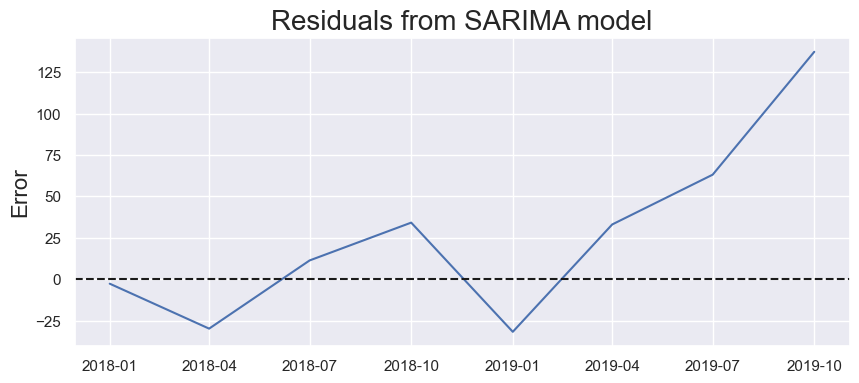

In [54]:
residuals_sarima = test_sarima - predicted_sarima

plt.figure(figsize=(10,4))
plt.plot(residuals_sarima)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA model', fontsize=20)
plt.ylabel('Error', fontsize=16)

# Plot

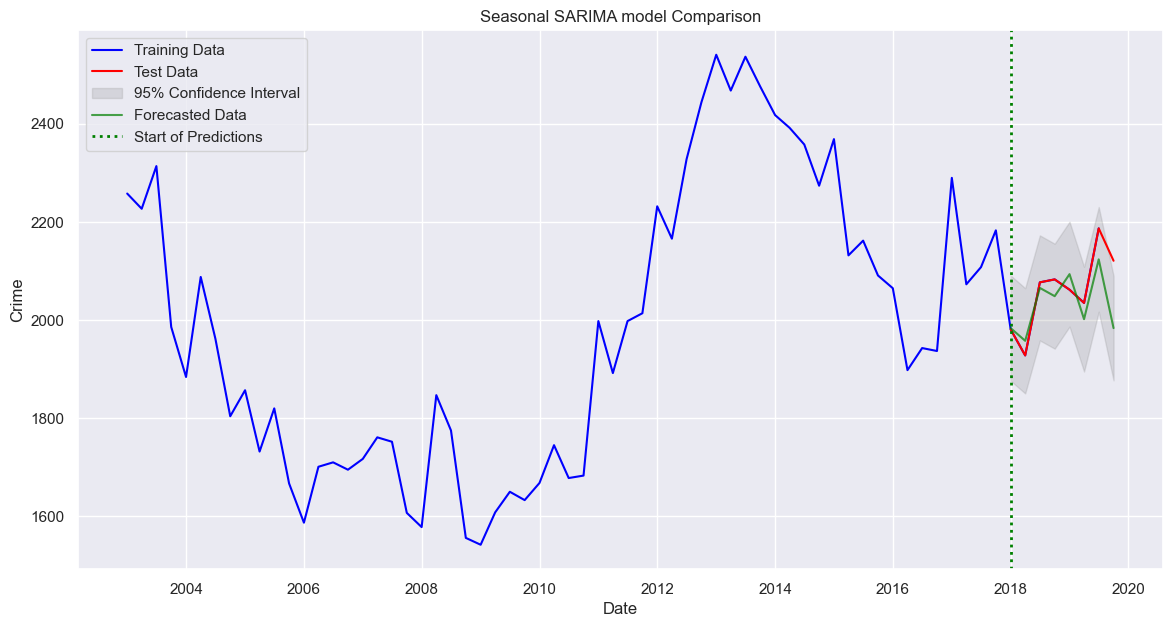

In [55]:
# Assuming 'theft_from_person_data', 'ci', and 'predictions' are defined properly
plt.figure(figsize=(14, 7))


# Plotting training data
plt.plot(train_sarima, label='Training Data', color='blue')  

# Plotting testoing data
plt.plot(test_sarima.index, test_sarima, label='Test Data', color='red')  # Using red for test data

# Adding confidence interval
plt.fill_between(ci_sarima.index, ci_sarima.iloc[:, 0], ci_sarima.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')

# Highlight the prediction period
plt.plot(predicted_sarima.index, predicted_sarima, label='Forecasted Data', color='green', alpha=0.7)

# adding a line where the model starts
plt.axvline(x=test_sarima.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

plt.xlabel('Date')
plt.ylabel('Crime')
plt.title('Seasonal SARIMA model Comparison')
plt.legend(loc='upper left')
plt.grid(True)  # Adding a grid for better readability
plt.show()

# Evaluation

In [56]:
# Calculate RMSE
rmse = np.sqrt(((predicted_sarima - test_sarima) ** 2).mean())
mae = mean_absolute_error(test_sarima, predicted_sarima)
mape = np.mean(np.abs((test_sarima - predicted_sarima) / test)) * 100


print('MAE:', round(mae, 2))
print('RMSE:', round(rmse, 2))
print('MAPE:', round(mape, 2), '%')

MAE: 42.91
RMSE: 58.24
MAPE: 2.05 %


In [57]:
################################################ Holt Winters Exponential Smoothing MODEL ################################################################
##############################################################################################################################
##############################################################################################################################

In [58]:
train_tes = train
test_tes = test

In [59]:
def tes_optimizer(train_tes, test_tes, abg, trend_mode='add', seasonal_mode = 'add', seasonal_period=4,step=8):
    """This function to optimize hyperparameters for the TES model

    Args:
        train (pd.Series): train dataset
        test (pd.Series): test dataset
        abg (list): a tuple list that holds tuple of alpha, beta, gamma values
        trend_mode (str, optional): 'add' || 'mul' . Is the trend additive or multiplying? Defaults to 'add'.
        seasonal_mode (str, optional): 'add' || 'mul' . Is the seasonality additive or multiplying?. Defaults to 'add'.
        seasonal_period (int, optional): Step number that evaluates for the seasonal period. Defaults to 12.
        step (int, optional): How many steps later will the model that created with the train dataset forecast?. Defaults to 48.

    Returns:
        [float, float, float, float]: best_alpha, best_beta, best_gamma, best_mae
    """
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")

    for comb in abg: # visit the each combination
        tes_model = ExponentialSmoothing(train_tes, trend=trend_mode, seasonal=seasonal_mode, seasonal_periods=seasonal_period).\
            fit(smoothing_level=comb[0], smoothing_trend=comb[1], smoothing_seasonal=comb[2]) # 0: alpha, 1: beta, 2: gamma. Creates a new TES instance by using each combination
        y_pred = tes_model.forecast(step) # forecast the `step` step later by using the TES instance
        mae = mean_absolute_error(test_tes, y_pred) # calculate the MAE (mean absolute error)
        if mae < best_mae: # mark the best parameters
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

In [60]:
alphas = betas = gammas = np.arange(0.10, 1, 0.10)
print("Alphas: {}\nBetas: {}\nGammas: {}".format(alphas, betas, gammas))

Alphas: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Betas: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Gammas: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [61]:
abg = list(itertools.product(alphas, betas, gammas)) # Creating combinations of the 3 lists
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train_tes,test_tes, abg)

[0.1, 0.1, 0.1, 183.88]
[0.1, 0.1, 0.2, 126.68]
[0.1, 0.1, 0.3, 102.84]
[0.1, 0.1, 0.4, 97.36]
[0.1, 0.1, 0.5, 102.73]
[0.1, 0.1, 0.6, 111.11]
[0.1, 0.1, 0.7, 121.64]
[0.1, 0.1, 0.8, 133.73]
[0.1, 0.1, 0.9, 147.02]
[0.1, 0.2, 0.1, 125.91]
[0.1, 0.2, 0.2, 119.82]
[0.1, 0.2, 0.3, 118.03]
[0.1, 0.2, 0.4, 114.87]
[0.1, 0.2, 0.5, 111.73]
[0.1, 0.2, 0.6, 109.82]
[0.1, 0.2, 0.7, 121.1]
[0.1, 0.2, 0.8, 134.04]
[0.1, 0.2, 0.9, 147.9]
[0.1, 0.3, 0.1, 286.91]
[0.1, 0.3, 0.2, 240.38]
[0.1, 0.3, 0.3, 194.8]
[0.1, 0.3, 0.4, 153.2]
[0.1, 0.3, 0.5, 135.33]
[0.1, 0.3, 0.6, 124.57]
[0.1, 0.3, 0.7, 120.24]
[0.1, 0.3, 0.8, 134.46]
[0.1, 0.3, 0.9, 149.13]
[0.1, 0.4, 0.1, 395.95]
[0.1, 0.4, 0.2, 306.02]
[0.1, 0.4, 0.3, 229.45]
[0.1, 0.4, 0.4, 171.02]
[0.1, 0.4, 0.5, 135.99]
[0.1, 0.4, 0.6, 122.93]
[0.1, 0.4, 0.7, 119.7]
[0.1, 0.4, 0.8, 135.02]
[0.1, 0.4, 0.9, 150.43]
[0.1, 0.5, 0.1, 390.8]
[0.1, 0.5, 0.2, 285.41]
[0.1, 0.5, 0.3, 195.84]
[0.1, 0.5, 0.4, 136.3]
[0.1, 0.5, 0.5, 115.05]
[0.1, 0.5, 0.6, 104.94]


[0.5, 0.5, 0.5, 285.96]
[0.5, 0.5, 0.6, 285.01]
[0.5, 0.5, 0.7, 286.04]
[0.5, 0.5, 0.8, 252.78]
[0.5, 0.5, 0.9, 177.97]
[0.5, 0.6, 0.1, 308.07]
[0.5, 0.6, 0.2, 297.93]
[0.5, 0.6, 0.3, 290.15]
[0.5, 0.6, 0.4, 277.77]
[0.5, 0.6, 0.5, 267.56]
[0.5, 0.6, 0.6, 269.55]
[0.5, 0.6, 0.7, 271.59]
[0.5, 0.6, 0.8, 198.56]
[0.5, 0.6, 0.9, 191.84]
[0.5, 0.7, 0.1, 280.83]
[0.5, 0.7, 0.2, 268.12]
[0.5, 0.7, 0.3, 257.32]
[0.5, 0.7, 0.4, 240.88]
[0.5, 0.7, 0.5, 230.03]
[0.5, 0.7, 0.6, 243.12]
[0.5, 0.7, 0.7, 256.49]
[0.5, 0.7, 0.8, 148.41]
[0.5, 0.7, 0.9, 210.34]
[0.5, 0.8, 0.1, 236.66]
[0.5, 0.8, 0.2, 222.56]
[0.5, 0.8, 0.3, 209.31]
[0.5, 0.8, 0.4, 188.71]
[0.5, 0.8, 0.5, 186.16]
[0.5, 0.8, 0.6, 224.31]
[0.5, 0.8, 0.7, 281.13]
[0.5, 0.8, 0.8, 150.8]
[0.5, 0.8, 0.9, 155.02]
[0.5, 0.9, 0.1, 181.38]
[0.5, 0.9, 0.2, 167.31]
[0.5, 0.9, 0.3, 155.48]
[0.5, 0.9, 0.4, 145.54]
[0.5, 0.9, 0.5, 155.4]
[0.5, 0.9, 0.6, 242.78]
[0.5, 0.9, 0.7, 386.72]
[0.5, 0.9, 0.8, 251.32]
[0.5, 0.9, 0.9, 170.27]
[0.6, 0.1, 0.1, 11

[0.9, 0.8, 0.6, 226.15]
[0.9, 0.8, 0.7, 267.12]
[0.9, 0.8, 0.8, 251.4]
[0.9, 0.8, 0.9, 269.99]
[0.9, 0.9, 0.1, 360.57]
[0.9, 0.9, 0.2, 299.18]
[0.9, 0.9, 0.3, 343.37]
[0.9, 0.9, 0.4, 368.66]
[0.9, 0.9, 0.5, 275.0]
[0.9, 0.9, 0.6, 264.48]
[0.9, 0.9, 0.7, 291.99]
[0.9, 0.9, 0.8, 274.62]
[0.9, 0.9, 0.9, 295.74]
best_alpha: 0.1 best_beta: 0.7 best_gamma: 0.3 best_mae: 55.3832


# Applying Holt-Winters Exponential Smoothing

In [62]:
final_tes_model = ExponentialSmoothing(train_tes, trend="add", seasonal="add", seasonal_periods=4).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma) # Creating the final tes model by using the best hyperparameters

y_pred = final_tes_model.forecast(8)

# Plot

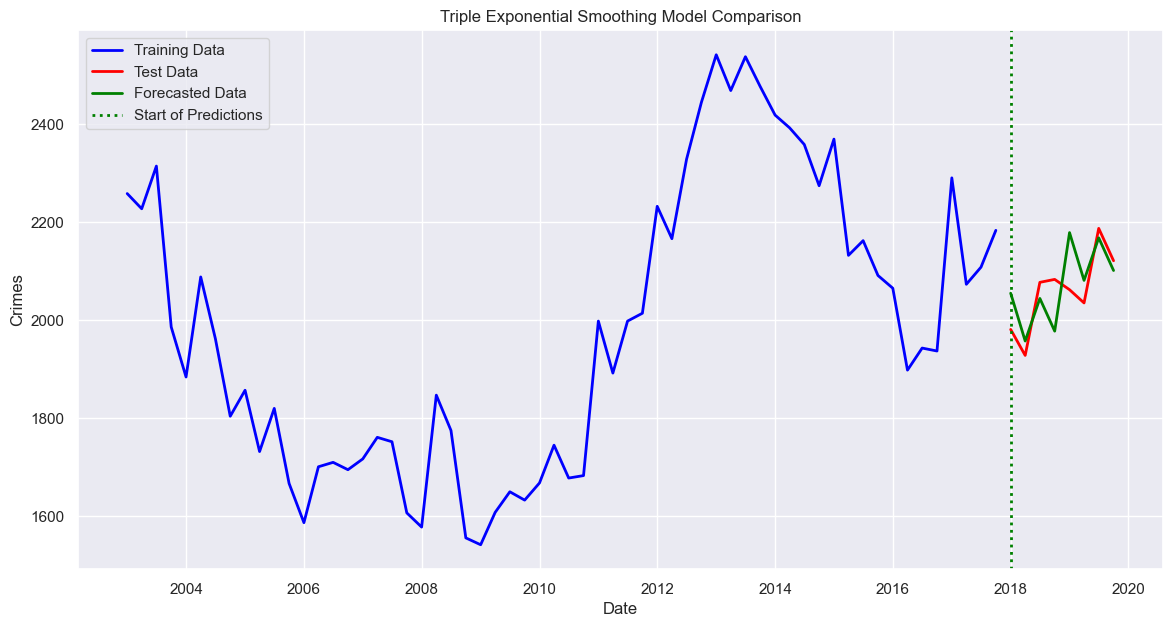

In [63]:
# Set figure size similar to the provided plot
plt.figure(figsize=(14, 7))


# Plotting training data
plt.plot(train_tes, label='Training Data', linewidth=2, color='blue')  
# Plotting test data
plt.plot(test_tes.index, test_tes, label='Test Data', linewidth=2,  color='red')  
# Plotting forecasted data
plt.plot(y_pred, label='Forecasted Data', linewidth=2, color='green')



# Adding a vertical line to indicate the start of predictions
plt.axvline(x=test_tes.index[0], color='green', linestyle=':', linewidth=2, label='Start of Predictions')

# Adding titles and labels
plt.title('Triple Exponential Smoothing Model Comparison')
plt.xlabel('Date')
plt.ylabel('Crimes')  # Adjust label according to the data context
plt.legend()
plt.grid(True)  # Enabling grid for better visualization
plt.show()

In [64]:
# Calculate RMSE
rmse = np.sqrt(((y_pred - test_tes) ** 2).mean())
mae = mean_absolute_error(test_tes, y_pred)
mape = np.mean(np.abs((test_tes - y_pred) / test_tes)) * 100

print('MAE:', round(mae, 2))
print('RMSE:', round(rmse, 2))
print('MAPE:', round(mape, 2), '%')

MAE: 55.38
RMSE: 66.1
MAPE: 2.7 %


In [65]:
################################################ PROPHET MODEL ################################################################
##############################################################################################################################
##############################################################################################################################

In [66]:
theft_from_person_data.rename(columns={'Crime': 'y', 'Date': 'ds'}, inplace=True)

In [67]:
theft_from_person_data

,y
Date,
2003-01-01,2258
2003-04-01,2227
2003-07-01,2314
2003-10-01,1986
2004-01-01,1884
...,...
2018-10-01,2083
2019-01-01,2062
2019-04-01,2035


In [68]:
train_prophet = theft_from_person_data.loc['2003-01-01': '2017-10-01']
test_prophet = theft_from_person_data.loc['2018-01-01':'2019-10-01']

In [69]:
train_prophet.reset_index(inplace=True)
test_prophet.reset_index(inplace=True)
train_prophet.rename(columns={'Date': 'ds'}, inplace=True)
test_prophet.rename(columns={'Date': 'ds'}, inplace=True)

In [70]:
m_prophet = Prophet(
    changepoint_prior_scale=0.5,   # Default is 0.05, increase for more flexibility
    seasonality_prior_scale=10.0,  # Default is 10, adjust as needed
    holidays_prior_scale=0.1,      # Default is 10, decrease for less flexible holidays
    seasonality_mode='multiplicative'  # Especially useful if seasonality magnitude grows over time
)
model_prophet = m_prophet.fit(train_prophet)

14:11:52 - cmdstanpy - INFO - Chain [1] start processing
14:11:53 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
future_prophet = m_prophet.make_future_dataframe(periods=7, freq = 'QS')

In [72]:
forecast_prophet = m_prophet.predict(future_prophet)
forecast_prophet[['ds', 'yhat']].tail(7)

,ds,yhat
60,2018-01-01,2094.560939
61,2018-04-01,2043.546677
62,2018-07-01,2084.645552
63,2018-10-01,1996.790439
64,2019-01-01,2018.033097
65,2019-04-01,2024.451543
66,2019-07-01,2084.164608


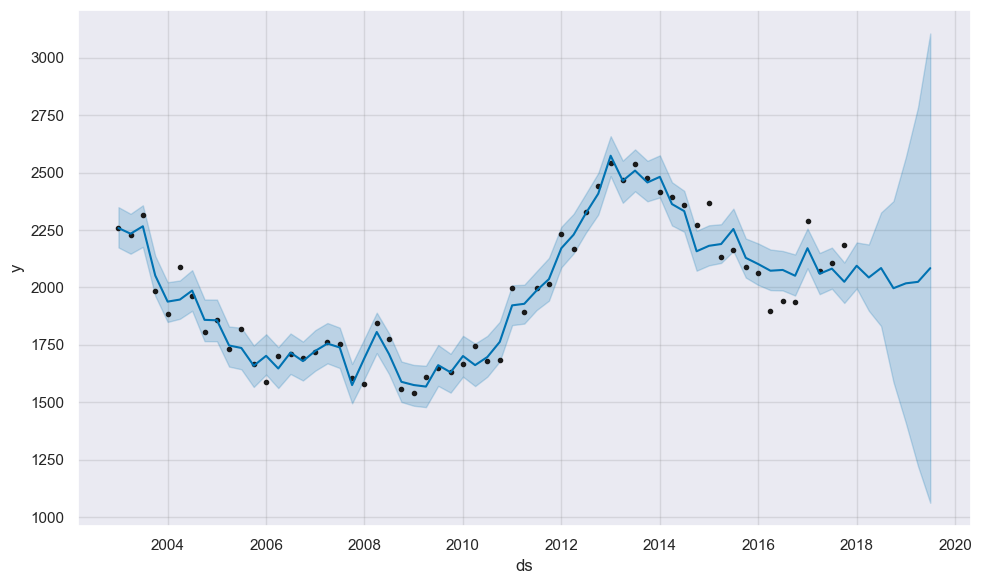

In [73]:
plot1 = m_prophet.plot(forecast_prophet)

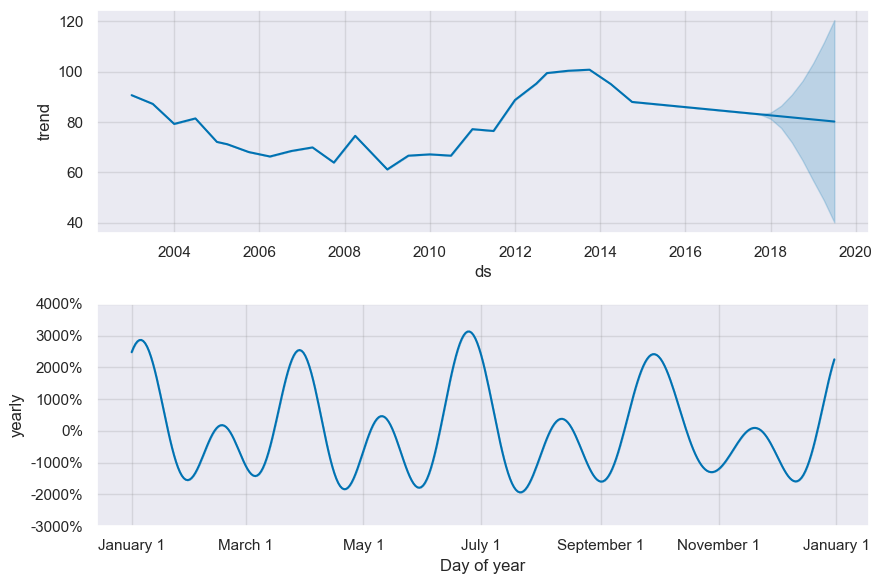

In [74]:
plot2 = m_prophet.plot_components(forecast_prophet)

In [75]:
np.sqrt(mean_squared_error(y_true=test_prophet['y'], 
                          y_pred=forecast_prophet['yhat'].tail(8)))


88.81333009622236

In [76]:
mean_absolute_error(y_true=test_prophet['y'],
                    y_pred=forecast_prophet['yhat'].tail(8))

65.87841797217038

In [77]:
mean_absolute_percentage_error(y_true=test_prophet['y'],
                               y_pred=forecast_prophet['yhat'].tail(8))*100

3.2131822833579986

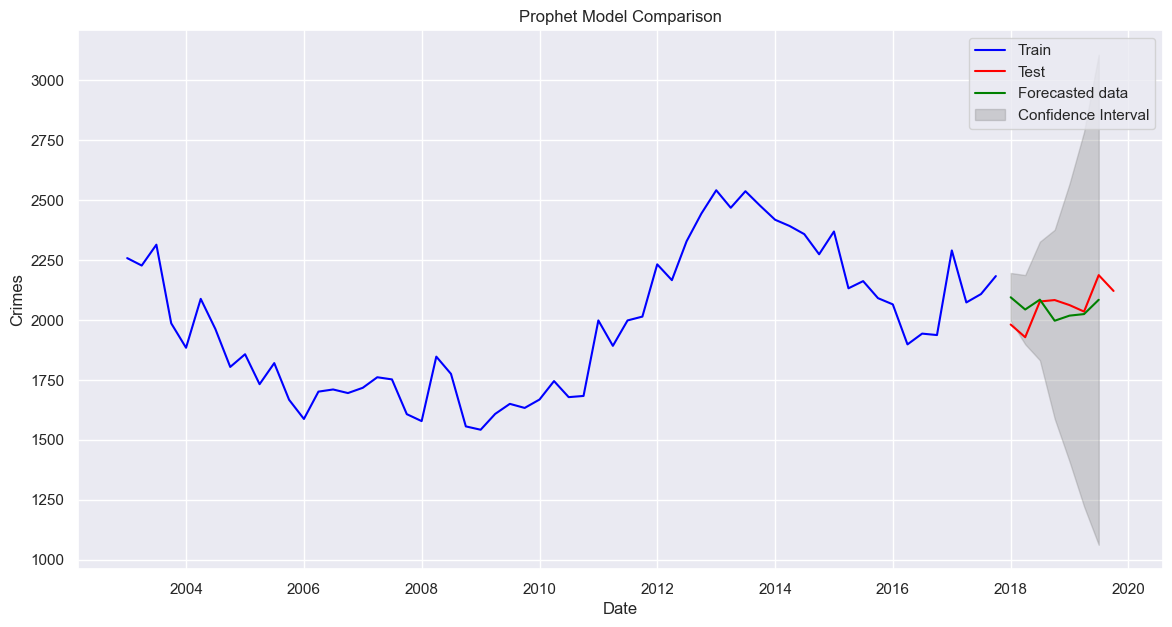

In [78]:
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train', color='blue')

# Plot test data
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test', color='red')

# Plot forecast
forecast_period = forecast_prophet[(forecast_prophet['ds'] >= test_prophet['ds'].min()) & (forecast_prophet['ds'] <= test_prophet['ds'].max())]
plt.plot(forecast_period['ds'], forecast_period['yhat'], label='Forecasted data', color='green')

plt.fill_between(forecast_period['ds'], forecast_period['yhat_lower'], forecast_period['yhat_upper'], color='gray', alpha=0.3, label='Confidence Interval')


plt.title('Prophet Model Comparison')
plt.xlabel('Date')
plt.ylabel('Crimes') 
plt.legend()
plt.grid(True)
plt.show()